# Intrest Rates and the Effects of the Federal Reserve on the Market and the Overall United States Economy

### A Macro Case Study on the Rising Intrest Rates and The effects on the US American Economy Using the FRED API 


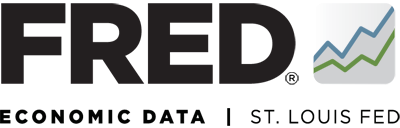


# By Parker Christenson

What is "FRED"? 
 - FRED is the ST. Louis Fed, and they provide all kinds of Economic Data
 
What is the Goal of this project? 
 - The Goal of this project is to look at the rising intrest rates, and compare the Overall Economic Health, along with looking at the overall effects of rising intrest rates on specific parts of the United States Economy. 
  
What will we be observing? 
 - We will be looking at the bond Market, CPI Data, M2 Money supply, and a couple other important Economic Sectors within the United States. 
 
What is the Time Range for this project? 
 - The Range In which I will be presenting this data will span over the Past two years. During 2020-2021, The FED had intrest rates at zero percent, but in the past 8 months they have agressively started to bring intrest rates up to stop inflation and making the cost of living even more harsh on consumers. 

## Importing all of the Libraries

In [2]:
import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

# Hiding my API Key 
with open('F:\API_Key_FRED.txt', 'r') as f:
    api_key = f.read().strip()

## Getting the Inflation Rate from CSV 

In [12]:
csv_file = r'F:\FPCPITOTLZGUSA.csv'
df = pd.read_csv(csv_file)
print(df.head())      

         DATE  FPCPITOTLZGUSA
0  1960-01-01        1.457976
1  1961-01-01        1.070724
2  1962-01-01        1.198773
3  1963-01-01        1.239669
4  1964-01-01        1.278912


In [13]:
# Create a line plot of the data
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df['DATE'], df['FPCPITOTLZGUSA'], color='blue')
ax.set_title('Inflation Rate As %')
ax.set_xlabel('Date')
ax.set_ylabel('% Change')
ax.grid(True)
ax.axvspan('2020-01-01', '2022-01-01', color='yellow', alpha=0.2)
n = len(df['DATE'])
ax.set_xticks(range(0, n, 2))
ax.set_xticklabels(df['DATE'][::2], rotation=45)
plt.show()

## Highlighted is the years 2020-2021
### With the chart being a percent change monthly, we are able to see the monthly percent change in the inflation within the economy. This is the complete story on why infaltion, and consumer prices got so high. 

Considering this, lets take a look at the average prices of goods during this time, and see if there is any coorelation with the M2 Money supply, and the consumer prices getting out of control. We will not be relating this to gas/oil prices because during 2020 in the spring, oil prices hit zero which the only thing they could do to stablize prices in the oil sector would be to cut the overall production of oil. 

# Getting the Secured Overnight Borrowing Rate Data 

## The Secured Overnight Financing Rate (SOFR) is a broad measure of the cost of borrowing cash overnight collateralized by Treasury securities.

In [16]:
# Set the ID 
series_id = 'SOFR'

# Set the date range for the data
start_date = '2018-05-05'
end_date = '2022-01-05'

# Construct the API request URL 
url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json&observation_start={start_date}&observation_end={end_date}'

# Send the API request and retrieve the data in json
response = requests.get(url).json()

# Extract the relevant data from the JSON object and put it into a pandas DF
sofr_data = pd.DataFrame(response['observations'])
sofr_data['date'] = pd.to_datetime(sofr_data['date'])
sofr_data['value'] = pd.to_numeric(sofr_data['value'], errors='coerce')
sofr_data.dropna(subset=['value'], inplace=True)

sofr_data

realtime_start realtime_end       date  value
0       2023-05-08   2023-05-08 2018-05-07   1.71
1       2023-05-08   2023-05-08 2018-05-08   1.72
2       2023-05-08   2023-05-08 2018-05-09   1.72
3       2023-05-08   2023-05-08 2018-05-10   1.73
4       2023-05-08   2023-05-08 2018-05-11   1.73
..             ...          ...        ...    ...
953     2023-05-08   2023-05-08 2021-12-30   0.05
954     2023-05-08   2023-05-08 2021-12-31   0.05
955     2023-05-08   2023-05-08 2022-01-03   0.05
956     2023-05-08   2023-05-08 2022-01-04   0.05
957     2023-05-08   2023-05-08 2022-01-05   0.05

[917 rows x 4 columns]

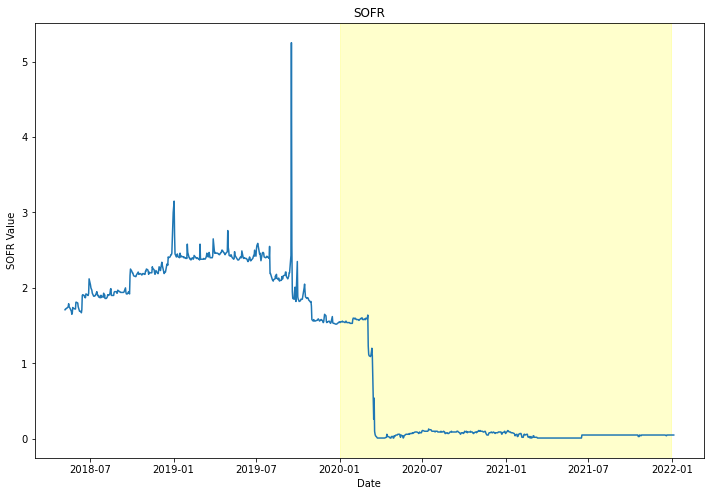

In [17]:
# Create a line plot of the SOFR data
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(sofr_data['date'], sofr_data['value'])
ax.set_title('SOFR')
ax.set_xlabel('Date')
ax.set_ylabel('SOFR Value')
ax.axvspan('2020-01-01', '2021-12-31', color='yellow', alpha =0.2)
plt.show()

### Looking at the Secured overnight borrowing rate 
The Secured Overnight Borrowing rate is the rate in which the banks are able to lend money to eachother to make sure that they are able to meet their cash on hand requirements. DUring almost all of the pandemic, the rate in which banks where able to borrow where almost near zero. The low overnight borrow rates mean that people are able to secure intrest loans for "cheap". That means more money will be pulled from the banks and put out into the Economy. 

# Getting The M2 Money Supply Data
 M2 is a measure of the U.S. money stock that includes M1 (currency and coins held by the non-bank public, checkable deposits, and travelers' checks) plus savings deposits (including money market deposit accounts), small time deposits under $100,000, and shares in retail money market mutual funds(FRED, 2022). This Matters because it is the actualy amount of dollars that are in circulation at the moment it is mesured

In [18]:
# M2 Money Stock
series_id = 'M2SL'

# Set the date range 
start_date = '2018-01-05'
end_date = '2022-01-05'

# Construct the API request URL 
url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json&observation_start={start_date}&observation_end={end_date}'

# Send the API request and retrieve the data in json
response = requests.get(url).json()

# Extract the relevant data from the JSON object and put it into a pandas dataframe
m2_data = pd.DataFrame(response['observations'])

# Convert the 'date' column to a pandas datetime
m2_data['date'] = pd.to_datetime(m2_data['date'])

# Convert the 'value' column to a numeric data type
m2_data['value'] = pd.to_numeric(m2_data['value'], errors='coerce')

# Drop any rows with missing values
m2_data.dropna(subset=['value'], inplace=True)

# Print the resulting DataFrame
print(m2_data.head())

  realtime_start realtime_end       date    value
0     2023-05-08   2023-05-08 2018-01-01  13869.7
1     2023-05-08   2023-05-08 2018-02-01  13912.3
2     2023-05-08   2023-05-08 2018-03-01  13970.2
3     2023-05-08   2023-05-08 2018-04-01  13988.8
4     2023-05-08   2023-05-08 2018-05-01  14047.2


In [19]:
# Create a line chart using matplotlib
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(m2_data['date'], m2_data['value'])
ax.set_title('M2 Money Stock')
ax.set_xlabel('Date')
ax.set_ylabel('M2 Money Stock Value')
ax.axvspan('2020-01-01', '2021-12-31', color='yellow', alpha=0.2)

# Format the x-axis to show only the year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

## Highlighted is the years 2020-2021

### For this next part I will be doing another API request to get the percent Change for the years that are highlighted, when the money supply started to increase dramatically

In [20]:
series_id = 'M2SL'
start_date = '2018-01-05'
end_date = '2023-05-05'
url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json&observation_start={start_date}&observation_end={end_date}'
response = requests.get(url).json()
m2_data_m = pd.DataFrame(response['observations'])
m2_data_m['date'] = pd.to_datetime(m2_data_m['date'])
m2_data_m['value'] = pd.to_numeric(m2_data_m['value'], errors='coerce')
m2_data.dropna(subset=['value'], inplace=True)
start_date = '2020-01-01'
end_date = '2022-12-31'
mask = (m2_data_m['date'] >= start_date) & (m2_data_m['date'] <= end_date)
filtered_data = m2_data_m.loc[mask]
filtered_data.loc[:, 'monthly_change'] = filtered_data.loc[:, 'value'].pct_change()
average_monthly_change = filtered_data['monthly_change'].mean()
print('The average monthly change in the M2 money supply for the months between {} and {} is {:.2%}.'.format(start_date, end_date, average_monthly_change))


The average monthly change in the M2 money supply for the months between 2020-01-01 and 2022-12-31 is 0.95%.


C:\Users\user\AppData\Local\Temp\ipykernel_11268\2864738951.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'monthly_change'] = filtered_data.loc[:, 'value'].pct_change()


### The printed Statement followed was, "The average monthly change in the M2 money supply for the months between 2020-01-01 and 2022-12-31 is 0.95%." 

Questions to start Asking

- Considering that we now have all of the data surrounding the M2 money supply, and the Overnight Secured Borrowing rates, what did inflation look like during this period of time? 
- What Happend to the consumer Prices during the Rapid increase?

# Getting CPI Data

The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a price index of a basket of goods and services paid by urban consumers. Percent changes in the price index measure the inflation rate between any two time periods. The most common inflation metric is the percent change from one year ago. It can also represent the buying habits of urban consumers. This particular index includes roughly 88 percent of the total population, accounting for wage earners, clerical workers, technical workers, self-employed, short-term workers, unemployed, retirees, and those not in the labor force.

In [21]:
# Path to the CSV file on your desktop
cpi_data = r'F:\CPIAUCSL.csv'
cpi_df = pd.read_csv(cpi_data)
print(cpi_df.head())                                  

         DATE  CPIAUCSL
0  2015-05-01   237.001
1  2015-06-01   237.657
2  2015-07-01   238.034
3  2015-08-01   238.033
4  2015-09-01   237.498


In [22]:
# Create a line plot of the data
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(cpi_df['DATE'], cpi_df['CPIAUCSL'], color='blue')
ax.set_title('Basket of Goods Cost')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.axvspan('2020-01-01', '2022-01-01', color='yellow', alpha=0.2)
n = len(df['DATE'])
ax.set_xticks(range(0, n, 2))
plt.show()

# Summary of Part 1

We looked at the M2 money supply, CPI data, Secure Overnight Borrow rate, and lastly inlfation Rate. We Can see that during the same time the M2 money supply went up, we where able to see that the cost of the goods went up. We Also saw how that during the covid-19 time period, there was a long period of time that the intrest rates were very low. With that in mind, we are able to conclude that due to the intrest rates being so low, for such a long period of time, inflation was able to go up, and due to inflation going up, CPI, and the average basket of goods was also able to go up during this time period. This creates a hard situation on consumers, because the costs of goods keep on going up, while at the same time, their dollar purchasing power is going down. 

# What are the Next Questions that Can be Asked? 

- What happens to the stock market during this time period of cheap money? 
- What happens to the 5year and the 10 year Treasurey bond during this time period? 
- What happens to the bond and stock market when the Federal Reserve starts to bring down the intrest rates? 
- Whats the average returns of the stock market during the Intrest Rate Hikes? 
- What happens to the Average home sale price? 
- How many homes are bought before the intrest rate hike, and how many are sold after? 

# Getting the financial data using Yahoo finance  
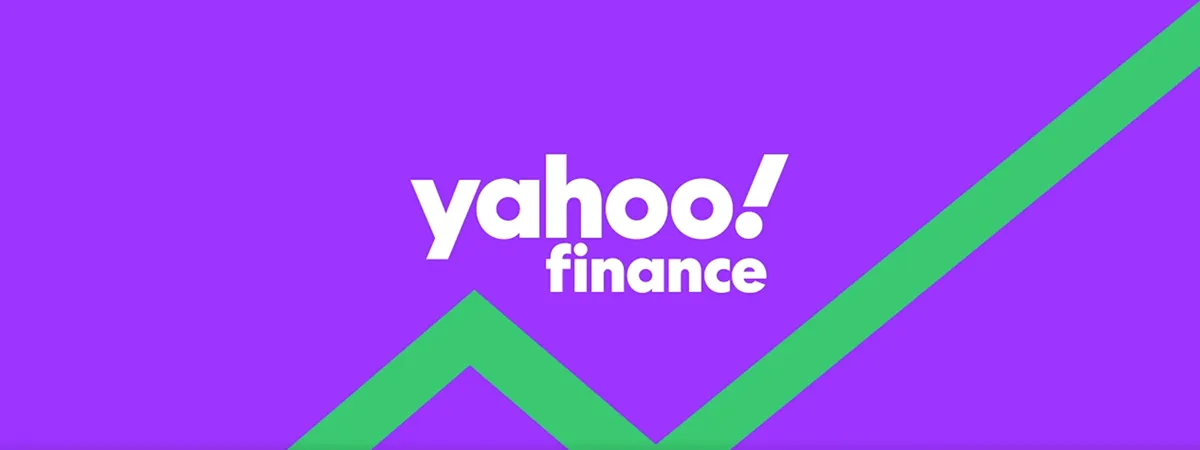
### The first time frame will be the return from when the overnight borrowing rate was at or near zero, and the second time frame will be when the overnight borrowing rate started to come up, and the money supply started to shrink. 

## Low Intrest Rate Data S&P500 and Dow Jones 

In [23]:
ticker_symbol = '^GSPC'
start_date = '2019-01-01'
end_date = '2021-12-31'
sp500_data = yf.download(ticker_symbol, start=start_date, end=end_date, progress=False)
gspc_low_ir_data = sp500_data[['Open', 'High', 'Low', 'Close']].dropna()
gspc_low_ir_data

Open         High          Low        Close
Date                                                          
2019-01-02  2476.959961  2519.489990  2467.469971  2510.030029
2019-01-03  2491.919922  2493.139893  2443.959961  2447.889893
2019-01-04  2474.330078  2538.070068  2474.330078  2531.939941
2019-01-07  2535.610107  2566.159912  2524.560059  2549.689941
2019-01-08  2568.110107  2579.820068  2547.560059  2574.409912
...                 ...          ...          ...          ...
2021-12-23  4703.959961  4740.740234  4703.959961  4725.790039
2021-12-27  4733.990234  4791.490234  4733.990234  4791.189941
2021-12-28  4795.490234  4807.020020  4780.040039  4786.350098
2021-12-29  4788.640137  4804.060059  4778.080078  4793.060059
2021-12-30  4794.229980  4808.930176  4775.330078  4778.729980

[756 rows x 4 columns]

## Doing some simple math we can see that S&P500 returned over the span of two years,  18.33%. 

Percent Change = ((inital Value- new value)/Inital value) x 100)

## Getting the Dow Jones Data 

In [24]:
# Set the ticker symbol for the S&P 500
ticker_symbol = '^DJI'

start_date = '2019-01-01'
end_date = '2021-12-31'
dji_low_ir_data = yf.download(ticker_symbol, start=start_date, end=end_date, progress=False)
dji_low_ir_data = dji_low_ir_data[['Open', 'High', 'Low', 'Close']].dropna()
dji_low_ir_data

Open          High           Low         Close
Date                                                              
2019-01-02  23058.609375  23413.470703  22928.589844  23346.240234
2019-01-03  23176.390625  23176.390625  22638.410156  22686.220703
2019-01-04  22894.919922  23518.640625  22894.919922  23433.160156
2019-01-07  23474.259766  23687.740234  23301.589844  23531.349609
2019-01-08  23680.320312  23864.650391  23581.449219  23787.449219
...                  ...           ...           ...           ...
2021-12-23  35782.421875  36060.988281  35782.421875  35950.558594
2021-12-27  35954.480469  36306.609375  35954.480469  36302.378906
2021-12-28  36302.988281  36527.261719  36302.988281  36398.210938
2021-12-29  36421.140625  36571.550781  36396.191406  36488.628906
2021-12-30  36522.480469  36679.441406  36372.128906  36398.078125

[756 rows x 4 columns]

## Doing some simple math we can see that Dow Jones returned over the span of two years, 15.74%.  

Percent Change = ((inital Value- new value)/Inital value) x 100)

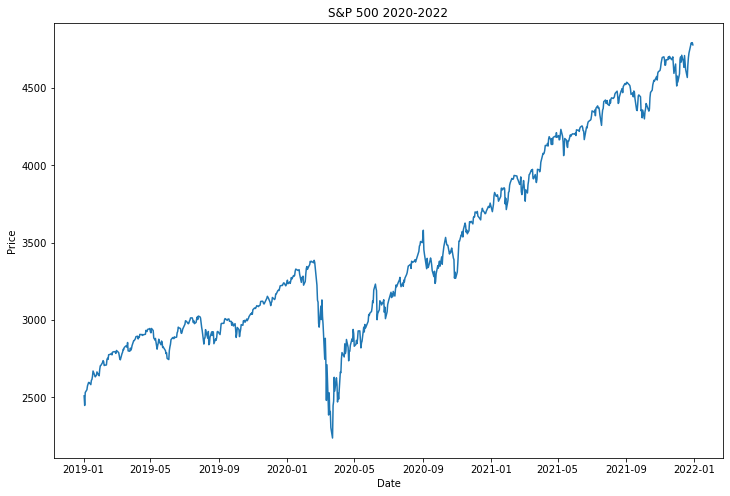

In [25]:
gspc_close_data = gspc_low_ir_data['Close']
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(gspc_close_data)
ax.set_title('S&P 500 2020-2022')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

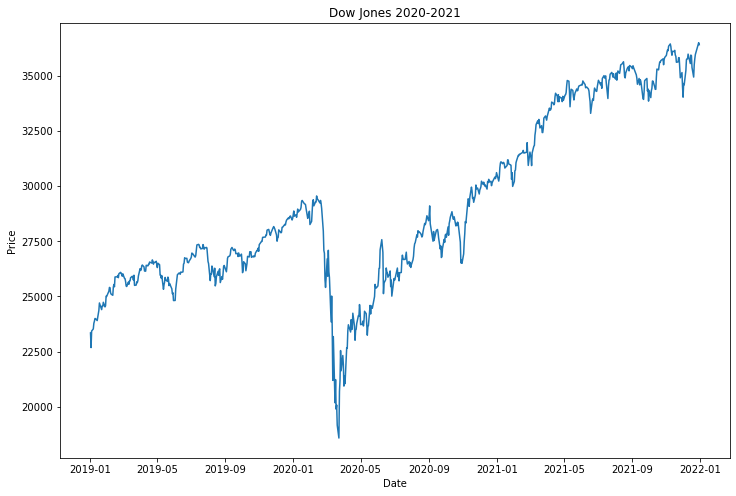

In [26]:
dji_close_data = dji_low_ir_data['Close']
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(dji_close_data)
ax.set_title('Dow Jones 2020-2021')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

## Getting the 10-year and the 5-year Treasury Bonds for the years 2020-2022

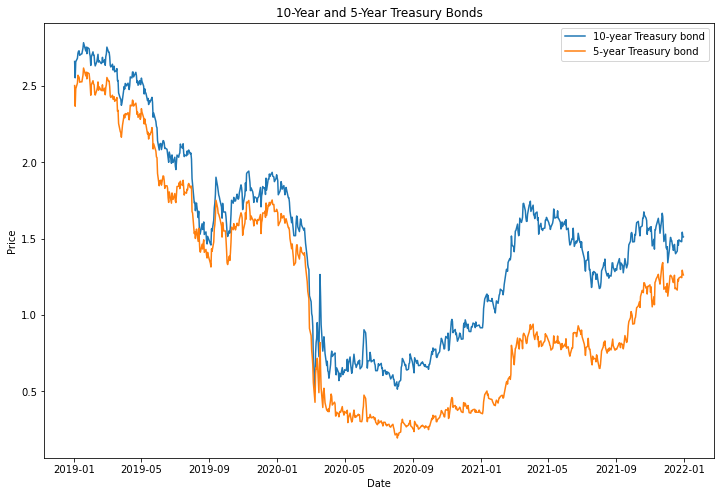

In [27]:
# Bond Names
t10y_symbol = '^TNX'
t5y_symbol = '^FVX'

# Start and end dates
start_date = '2019-01-01'
end_date = '2021-12-31'

# Requesting the data 
t10y_data = yf.download(t10y_symbol, start=start_date, end=end_date, progress=False)
t5y_data = yf.download(t5y_symbol, start=start_date, end=end_date, progress=False)

# Extract the 'Close' column from the data for both bonds
t10y_close = t10y_data['Close']
t5y_close = t5y_data['Close']


# Create the Chart 
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(t10y_close, label='10-year Treasury bond')
ax.plot(t5y_close, label='5-year Treasury bond')

# Set the title and labels
ax.set_title('10-Year and 5-Year Treasury Bonds')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Adding a legend 
ax.legend()

plt.show()

## Explaining the way the bond Market Works

The 5-year and 10-year Treasury bond prices represent the current market value of US government-issued debt securities that mature in 5 years and 10 years, respectively. These bonds are considered relatively low-risk investments, as they are backed by the full faith and credit of the US government. As such, they typically offer lower yields than riskier investments such as stocks or corporate bonds.

Investors can make money on Treasury bonds in a few ways. One way is through price appreciation, which occurs when the market value of the bond increases. This can happen if interest rates decrease, as the bond's fixed interest payments become more attractive relative to new bonds being issued at lower rates.

Another way to make money on Treasury bonds is through the interest payments, or yield, that the bonds provide. The yield is the annual rate of return an investor receives from holding the bond. Treasury bonds typically pay a fixed interest rate, which is paid out in semi-annual installments until the bond matures.

### What we know about this time period 

- The intrest Rates during this time period where at near zero which explains why the bond rates increase dramatically. 
- Investors also had more money to dump into bonds, which means that the bond prices could expand greatly. 

# Looking at the De-flation period and the effects of the rising intrest rates on Intrest rates, CPI Data, and the Stock Market 


### We will be looking at an anlytical approach to looking at the markets, and their reaction to the increasing of the intrest rates. We will also be looking at the way that the rising inrest rates have effected the consumer. There are more than one thing that is hurting the consumer, but we will be attempting to look at the whole picture. 

1. The Secured overnight Borrowing Rate after 2022
2. M2 Money supply after 2022
3. Basket Cost of Goods after 2022 
4. Stock Markets Reactions to the Intrest Rate Hikes 

## Secured Overnight Borrowing Rates 2022-2023

#### The SOBR started to get hiked as an attempt to curb the inflation. This is typically the cause of the markets starting to take a downturn. The effects are going to be the reaction to this event. 

In [28]:
# Hiding API Key 
with open('F:\API_Key_FRED.txt', 'r') as f:
    api_key = f.read().strip()
    
series_id = 'SOFR'

# New Date Range For all Of the SOFR Data
start_date = '2020-05-05'
end_date = '2023-05-07'

url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json&observation_start={start_date}&observation_end={end_date}'

sofr_23_response = requests.get(url).json()
sofr_data_23 = pd.DataFrame(sofr_23_response['observations'])
sofr_data_23['date'] = pd.to_datetime(sofr_data_23['date'])
sofr_data_23['value'] = pd.to_numeric(sofr_data_23['value'], errors='coerce')
sofr_data_23.dropna(subset=['value'], inplace=True)
#sofr_data_23

# Plot of the SOFR Data 
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(sofr_data_23['date'], sofr_data_23['value'])
ax.set_title('SOFR')
ax.set_xlabel('Date')
ax.set_ylabel('SOFR Value in %')
ax.axvspan('2022-01-01', '2023-05-07', color='yellow', alpha = 0.2)
plt.show()

## Getting the M2 Money Stock 

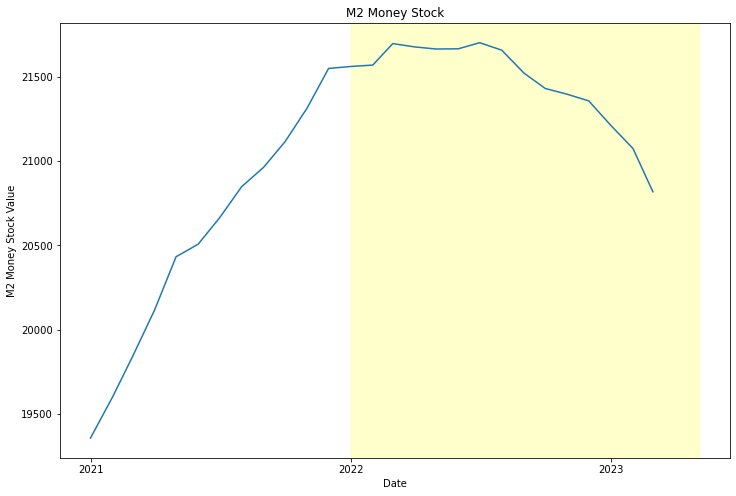

In [29]:
# M2 Money Stock
series_id = 'M2SL'
start_date = '2021-01-05'
end_date = '2023-05-05'
url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json&observation_start={start_date}&observation_end={end_date}'
response = requests.get(url).json()
new_m2_data = pd.DataFrame(response['observations'])
new_m2_data['date'] = pd.to_datetime(new_m2_data['date'])
new_m2_data['value'] = pd.to_numeric(new_m2_data['value'], errors='coerce')
new_m2_data.dropna(subset=['value'], inplace=True)

#print(new_m2_data.head())\
# Create a line chart using matplotlib
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(new_m2_data['date'], new_m2_data['value'])
ax.set_title('M2 Money Stock')
ax.set_xlabel('Date')
ax.set_ylabel('M2 Money Stock Value')
ax.axvspan('2022-01-01', '2023-05-05', color='yellow', alpha=0.2)

# Format the x-axis to show only the year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

## Getting The CPI data 2022-2023

In [30]:
new_cpi_data = r'F:\CPIAUCSL.csv'
new_cpi_df = pd.read_csv(new_cpi_data)    
# Filter the data to only include dates from 2021-2023
mask = (new_cpi_df['DATE'] >= '2020-01-01') & (new_cpi_df['DATE'] <= '2023-12-31')
new_cpi_df = new_cpi_df.loc[mask]

# Plot the data
fig, ax = plt.subplots(figsize=(23, 9))
ax.plot(new_cpi_df['DATE'], new_cpi_df['CPIAUCSL'], color='blue')
ax.set_title('Basket of Goods Cost')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.axvspan('2022-01-01', '2023-05-07', color='yellow', alpha=0.2)
n = len(new_cpi_df['DATE'])
ax.set_xticks(range(0, n, 2))
plt.show()

## Explination About the Data 

Most Americans have felt the pain all throughout their life when it comes to money. Their jobs might have given them a small raise in the middle of this inflationary period but, with that being said, the average basket costs have gotten more and more expensive. This is causing what some people would argue is a massive strain on the middle class. The combonation of the USD and the average cost of goods becoming more expensive, and the USD deflating, is a double edged sword going against the consumer, making day to day living harder. In the next section, we will be looking at the markets effects, and how the market has reacted to the intrest rates going up. 

## How the US stock market reacts to the Intrest rate hikes

### S&P500 Data

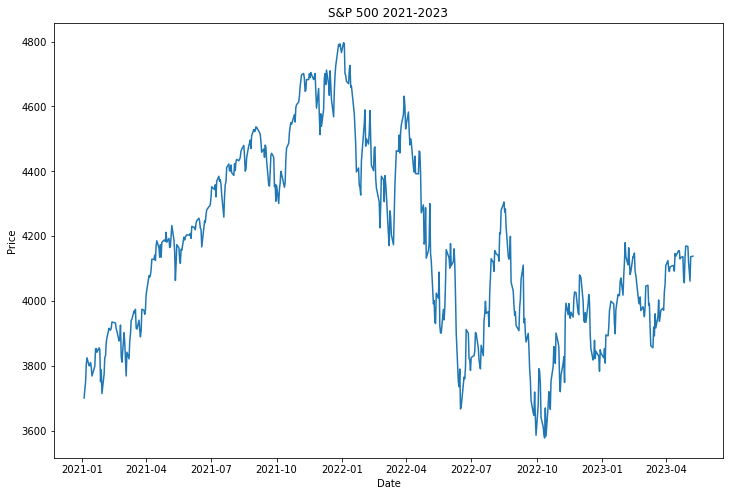

In [31]:
ticker_symbol = '^GSPC'
start_date = '2021-01-01'
end_date = '2023-12-31'
sp500_data = yf.download(ticker_symbol, start=start_date, end=end_date, progress=False)
gspc_high_ir_data = sp500_data[['Open', 'High', 'Low', 'Close']].dropna()
#gspc_high_ir_data
gspc_close_data = gspc_high_ir_data['Close']
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(gspc_close_data)
ax.set_title('S&P 500 2021-2023')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

### Dow Jones Data 

In [32]:
# DowJones Stock Data
ticker_symbol = '^DJI'
start_date = '2021-01-01'
end_date = '2023-12-31'
dji_high_ir_data = yf.download(ticker_symbol, start=start_date, end=end_date, progress=False)
dji_high_ir_data = dji_high_ir_data[['Open', 'High', 'Low', 'Close']].dropna()
#dji_high_ir_data
dji_close_data = dji_high_ir_data['Close']
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(dji_close_data)
ax.set_title('Dow Jones 2020-2022')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

## What can We take away from these Two Charts? 

#### We can see that the Dow and The S&P both have had very very rocky past two years since the intrest rates have started to be hiked up. The Market likes when money is cheap, and when money is cheap, the market is able to go up with a lot less resitance. 

#### When Considering that the major US indices are slowly starting to tank there are underlying companies that bring these indices down. 

#### In this next section we will look at the bond market, and the biggest players in the stock market, and see how they have returned. 

## 5-Year and the 10-Year Tresury Bond

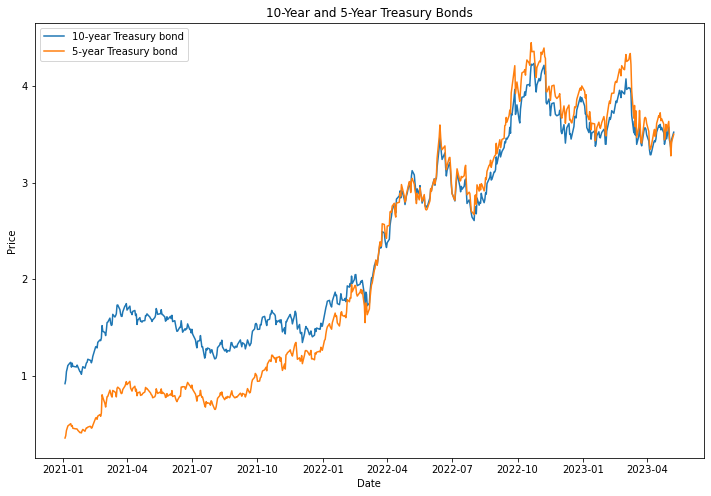

In [33]:
t10y_symbol = '^TNX'
t5y_symbol = '^FVX'
start_date = '2021-01-01'
end_date = '2023-12-31'
t10y_new_data = yf.download(t10y_symbol, start=start_date, end=end_date, progress=False)
t5y_new_data = yf.download(t5y_symbol, start=start_date, end=end_date, progress=False)
t10y_close_new = t10y_new_data['Close']
t5y_close_new = t5y_new_data['Close']
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(t10y_close_new, label='10-year Treasury bond')
ax.plot(t5y_close_new, label='5-year Treasury bond')
ax.set_title('10-Year and 5-Year Treasury Bonds')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()

plt.show()

With the intrest rates not moving at a normal rate, comparatively to the intrest rates, there is some speculation on why the bonds have not dropped significantly in value. Some people are speculating that the market thinks that the intrest rates are still going to keep going up, and that the bonds are going to slam back down at some point. The bond Market as a whole hasnt been unstable, but the volitility between the intra-day pricing has increased drastically. 

## Taking a look at some of the Innovators and Stock Market Leaders 

### Tesla

[*********************100%***********************]  1 of 1 completed


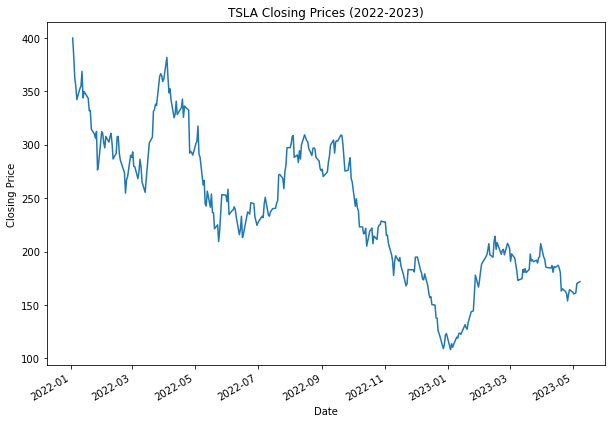

In [4]:
ticker = "TSLA"
start_date = "2022-01-01"
end_date = "2023-05-09"
data = yf.download(ticker, start=start_date, end=end_date)
data["Close"].plot(figsize=(10, 7))
plt.title("TSLA Closing Prices (2022-2023)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

### APPLE 

In [5]:
ticker = "AAPL"
start_date = "2022-01-01"
end_date = "2023-05-09"
data = yf.download(ticker, start=start_date, end=end_date)
data["Close"].plot(figsize=(10, 7))
plt.title("AAPL Closing Prices (2022-2023)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

[*********************100%***********************]  1 of 1 completed


### Google

[*********************100%***********************]  1 of 1 completed


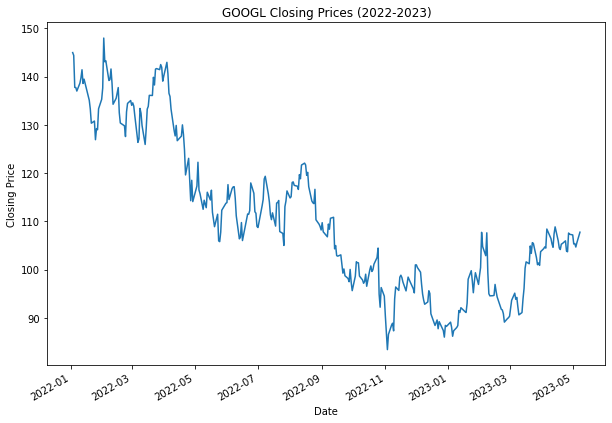

In [6]:
ticker = "GOOGL"
start_date = "2022-01-01"
end_date = "2023-05-09"
data = yf.download(ticker, start=start_date, end=end_date)
data["Close"].plot(figsize=(10, 7))
plt.title("GOOGL Closing Prices (2022-2023)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

### Ark Invest 

[*********************100%***********************]  1 of 1 completed


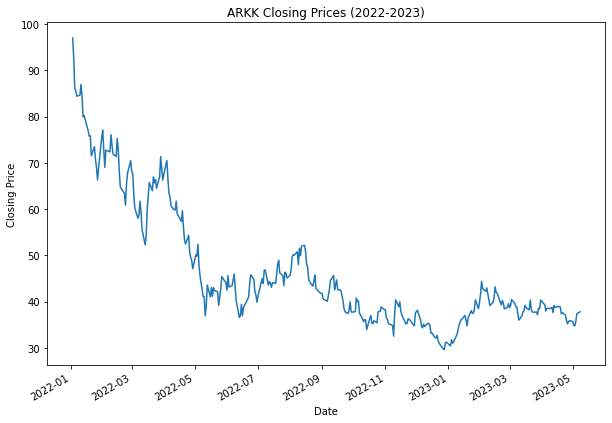

In [7]:
ticker = "ARKK"
start_date = "2022-01-01"
end_date = "2023-05-09"
data = yf.download(ticker, start=start_date, end=end_date)
data["Close"].plot(figsize=(10, 7))
plt.title("ARKK Closing Prices (2022-2023)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

### Invesco QQQ Trust 

In [8]:
ticker = "QQQ"
start_date = "2022-01-01"
end_date = "2023-05-09"
data = yf.download(ticker, start=start_date, end=end_date)
data["Close"].plot(figsize=(10, 7))
plt.title("QQQ Closing Prices (2022-2023)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

[*********************100%***********************]  1 of 1 completed


### Microsoft

In [9]:
ticker = "MSFT"
start_date = "2022-01-01"
end_date = "2023-05-09"
data = yf.download(ticker, start=start_date, end=end_date)
data["Close"].plot(figsize=(10, 7))
plt.title("MSFT Closing Prices (2022-2023)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

[*********************100%***********************]  1 of 1 completed


### Berkshire Hathaway 

[*********************100%***********************]  1 of 1 completed


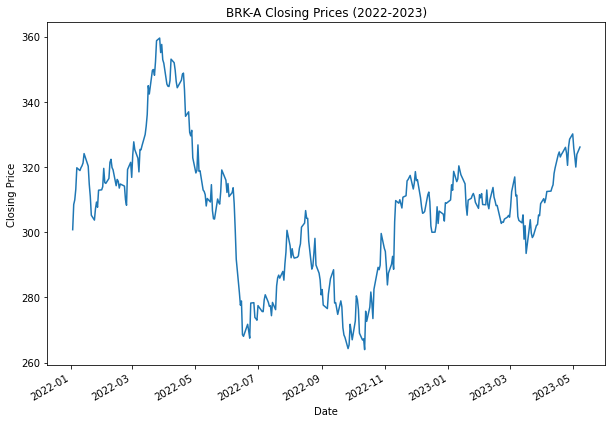

In [13]:
ticker = "BRK-B"
start_date = "2022-01-01"
end_date = "2023-05-09"
data = yf.download(ticker, start=start_date, end=end_date)
data["Close"].plot(figsize=(10, 7))
plt.title("BRK-A Closing Prices (2022-2023)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Conclusion And Final Thoughts

I think that the Federal Reserve is doing what the can to bring the inflation rate down by bringing up intrest rates slowly. I do not think that the Fed is slamming us into a recession. I personally think that this is a good recession, that needs to happen. In Arizona alone, home prices went up ~20% for the past two years. That makes housing super expensive, that was once "cheap" 

I would also like to add, that I think the Deflation of the Stock market, is a good thing. Some of these companies were "Covid stars". ARKK Invest is arguably one of the worst managed funds on wall street. ARKK Invest was once trading at +$137 a share. They gained most of their value during the years 2020 through early 2021. Which is on par with money being cheap, and the bigger players in the market being able to pump the stock, and dump it when the intrest rates started to creep back up. 

I would like to see the consumer prices start to drop as the USD starts to regain some of the Value. But there will be lots of things that need to be done to stop the prices continue to rise. I think that the SOBR doesn't effect the average person as much, because the average person does not take out massive loans, but every person grocery shops and needs certian things to survive. It will be very intresting to see what the Future holds. 


### Questions and Further Thoughts

- when thinking about the inflation problem, the costs of goods do need to come down significantly, the dollar is rising in value, but goods are getting more expensive. Thus making it harder for people to survive, if wages continue to stay stagnent. 

- The Stock market as a whole has had a very hard time gaining any value across all sectors, from tech to investment compainies due to the lack of consumerism, during this recession. 

- Considering that the M2 Money supply is starting to come back down, how much longer will the Federal reserve ontinue to keep the SOBR rates high? And Will the Federal Reserve raise rates even more? 

- What is going to happen to the unemployment rate if the Fed raises the inrest rates up even further?